In [12]:
# Import libraries
import pandas as pd
import numpy as np

In [13]:
# Reading dataset
nfl_data = pd.read_csv('NFL Play by Play 2009-2017 (v4).csv')

C:\Users\Frank Ibarra\AppData\Local\Temp\ipykernel_65080\2578414092.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv('NFL Play by Play 2009-2017 (v4).csv')


In [14]:
# Set seed for reproducibility
np.random.seed(0)

# Handling missing Values

## How many missing data points do we have

Primero miramos el dataframe para revisar si hay valores nulos

In [15]:
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


Sí encontramos valores nulos, por lo que vamos a ver el total de los mismos en todo el dataframe

In [16]:
missing_values = nfl_data.isnull().sum()
missing_values[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [17]:
# Forma total del DataFrame, (filas, columnas)
nfl_data.shape

(407688, 102)

Aquí vemos el total de datos que tenemos en el Dataframe

In [18]:
# How many total missing values do we have?
total_cells = np.prod(nfl_data.shape)
total_cells

np.int64(41584176)

Aquí vemos el total de valores nulos sumados de todas las filas y columnas

In [19]:
total_missing = missing_values.sum()
total_missing

np.int64(11505187)

Revisamos el porcentaje de valores nulos en todo nuestro dataset

In [20]:
percent_missing = (total_missing / total_cells) * 100
percent_missing

np.float64(27.66722370547874)

## Figure out why the data is missing

A esto le podríamos llamar `"Intuicion de datos"`, lo que significa revisar con atención los datos para decifrar si el dato faltante es por inexistencia o porque no se registró y de ahí saber qué hacer con esos valores.

Una de las preguntas más importantes que te puedes hacer en este proceso es la siguiente:
- `Este valor falta porque no fue registrado o porque no existe?`

Si hay un valor faltante porque no existe, como por ejemplo la altura de un niño, en una persona que no tiene hijos, aquí quisieramos permanecer con el valor nulo.

Pero si un valor falta porque no se registró, entonces puedes tratar de hacer una aproximación del valor basandote en los otros valores que sí tienes registrados, a esto se le llama `imputación`.

In [21]:
# Look at the number of missing points in the first ten columns
missing_values[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

## Drop Missing Values

The function `dropna()`

In [22]:
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Oh dear, it looks like taht's removed all our data!😱, This is because every row in our dataset had at least one missing value. We might have better luck removing all the columns that have at least one missing value instead.

In [23]:
columns_dropped = nfl_data.dropna(axis=1)
columns_dropped.head(1)

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [24]:
nfl_data.head(1)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009


## Filling in missing values automatically

In [25]:
# Get a small subset of the NFL Dataset
subset_nfl_data = nfl_data.loc[:,'EPA':'Season'].head()
subset_nfl_data.head(1)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009


`fillna()`

In [26]:
subset_nfl_data.fillna(0).head(1)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.0,0.0,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.0,0.0,2009


To replace all NA's with the value that comes directly after it in the same column

In [27]:
subset_nfl_data.fillna(method='bfill',axis=0).fillna(0)

C:\Users\Frank Ibarra\AppData\Local\Temp\ipykernel_65080\3504166744.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill',axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


#
---

# Scaling and Normalization

To better understanding about the differences:
- in `scaling`, you're changing the range of your data.
- in `normalization`, you're changing the shape of the distribution of your data.

In [28]:
# Importing libraries

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# We're using the same seed for reproducibility: `np.random.seed(0)`

## `Scaling`

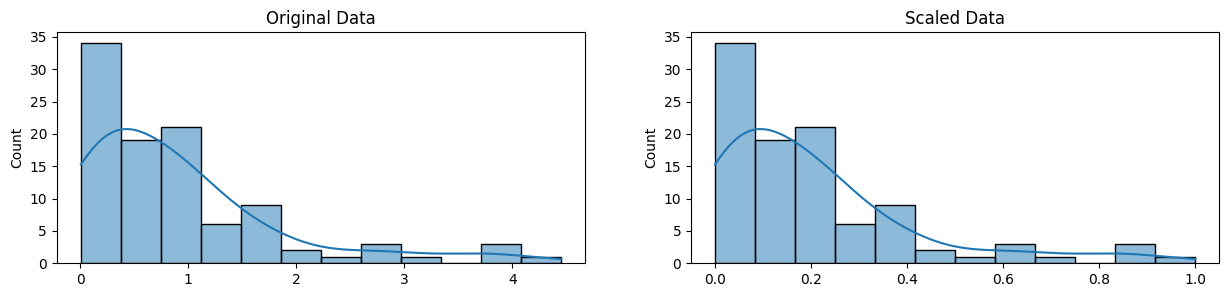

In [29]:
# Generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=100)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(original_data, ax=ax[0],kde=True,legend=False)
ax[0].set_title('Original Data')

sns.histplot(scaled_data, ax=ax[1],kde=True,legend=False)
ax[1].set_title('Scaled Data')

plt.show()

Notice that the shape of the data doesn't change, but now instead of ranging from 0 to 3, it now ranges from 0 to 1.

## `Normalization`

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observation so that they can be described as a normal distribution.
- `Normal distribution:` Also known as the "bell curve", is a distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same. This distribution is also known as  the Gaussian distribution.

The method we're using here is called `Box-Cox Transformation`.

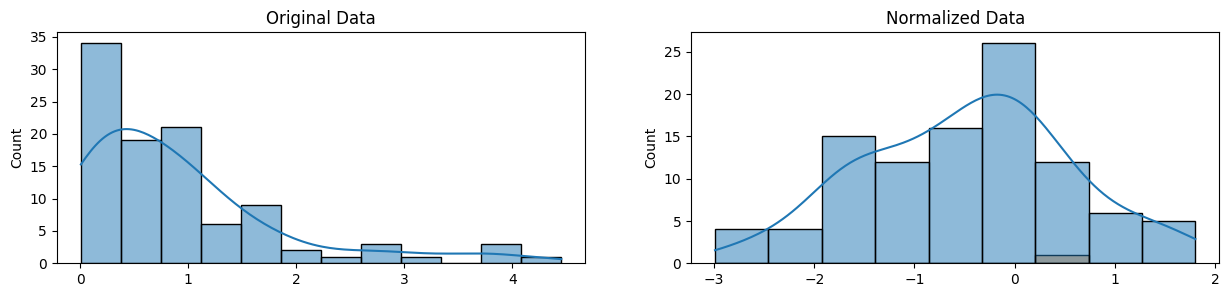

In [30]:
# Normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# Plot both together to compare
fig, ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(original_data, ax=ax[0],kde=True,legend=False)
ax[0].set_title('Original Data')

sns.histplot(normalized_data, ax=ax[1],kde=True,legend=False)
ax[1].set_title('Normalized Data')

plt.show()

Notice that the shape of our data has changed. After normalizing it looks more like the outline of a bell (hence "bell curve")

#
---

# Parsing Dates

In [31]:
# Importing the libraries
import datetime

In [32]:
# Load the Dataset
landslides = pd.read_csv('catalog.csv')

In [33]:
# Set seed for reproducibility
np.random.seed(0)

In [34]:
# Take a look at the first row of the data
landslides.head(1)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html


## Convert our date columns to datetime

You can find more information of converting dates with this link:
- https://strftime.org/

But the most common are:
- `%d` for Day
- `%m` for Month
- `%y` for two-digit Year
- `%Y` for a four-digit Year

Some examples:
- 17/1/07 has the format %d/%m/%y
- 17/1/2007 has the format %d-%m-%Y

In [35]:
# Create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'],format='%m/%d/%y') # <-- it have to be same at the dataset

In [36]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

We can see that the dates have been slightly rearranged so tat they fit the default order datetime objects (year-month-day)

`Note.` When there are multiple date formats in a single column, you can have Pandas try to infer what the right date format should be, looking like this:
- `landslides['date_parsed'] = pd.to_datetime(landslides['date'], infer_datetime_format=True)`

## Select the day of the month

In [37]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

<Axes: xlabel='date_parsed', ylabel='Count'>

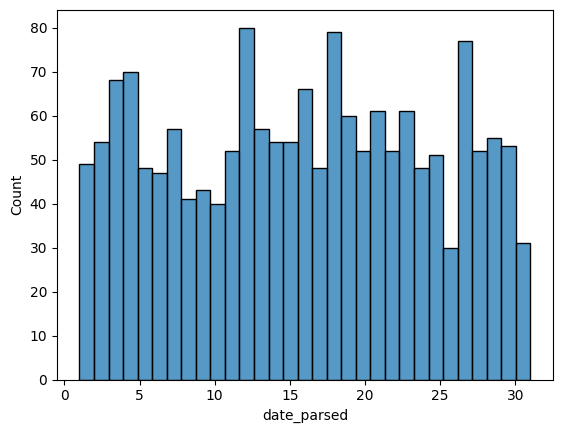

In [38]:
# Remove NA's
day_of_month_landslides = day_of_month_landslides.dropna()

# Plot the day of the month
sns.histplot(day_of_month_landslides,kde=False,bins=31)

`Extra:` Puede existir el caso en donde tengas que buscar una fecha que es diferente, para eso puedes medir la cantidad de letras para ver la fecha que está en diferente formato, por ejemplo:
- `"date_lengths = eartquakes['date'].str.len()"`

luego de eso ver cuantos en formato diferente hay en la columna:
- `"date_lengths.value_counts()"`

y ahora tenemos que encontrar el indice de esos datos diferentes:
- `"indices = np.where(date_lengths == 24)[1]"`
- `"earthquakes.loc[indices]"`

#
---

# Character Encodings

In [39]:
# Importing libraries
import charset_normalizer

## UTF-8

`UTF-8` is the standard text encoding

In [40]:
# Start with a string
before = 'This is the euro symbol: €'

# Check to see what datatype it is
type(before)

str

In [41]:
# Encode it to a different encoding, replacing characters that raise errors
after = before.encode('utf-8',errors='replace')

# Check the type
type(after)

bytes

In [42]:
after

b'This is the euro symbol: \xe2\x82\xac'

In [43]:
# Convert it back to utf-8
after.decode('utf-8')

'This is the euro symbol: €'

In [45]:
after = before.encode('ascii',errors='replace')
after.decode('ascii')

'This is the euro symbol: ?'

## Try to read in a file not UTF-8

Sometimes you need to guess the encoding type, but it could be complicated, so you can use `charset_normalizer` to get help it guessing the encoding type

In [49]:
with open('ks-projects-201801-utf8.csv','rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))

print(result)

{'encoding': 'utf-8', 'language': 'Spanish', 'confidence': 0.991}


Sometimes it wil guess the wrong encoding. One thing you can try is looking at more or less of the file and seeing if you get a different result and then try that.

### Saving your files with `UTF-8` encoding
Finally, once you've gone through all, you'll probablu want to keep it that way. The easiest way to do that is to save your files with UTF-8 encoding. The good news is that UTF-8 is the standard encoding in Python, so you only have to save the file and it will be UTF-8 by default
- `kickstarter_2016.to_csv('ks-projec...')`